In [1]:
%load_ext autoreload

%autoreload 2

import glob
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

import timelapse_analysis as ta

Previous issues: image width too wide; need to crop.

# 2018-05-29 Levain Timelapse - Double

In [13]:
@interact(index=widgets.IntSlider(min=0,max=109,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-05-29 Levain Timelapse/*.jpg')
    ta.test_image(fnames[index], crop_area=[100, 975, 300, 700], min_area=20000);
    

interactive(children=(IntSlider(value=10, description='index', max=109), Output()), _dom_classes=('widget-interact',))

386 875


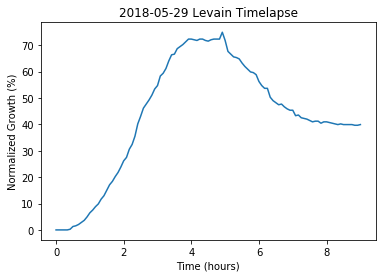

In [21]:
df_529left = ta.analyze_image('2018-05-29 Levain Timelapse', crop_area=[100, 975, 300, 700], min_area=20000)

In [49]:
ta.create_gif('2018-05-29 Levain Timelapse', crop_area=[100, 975, 300, 700], min_area=20000, df=df_529left)

## Right Jar

In [61]:
@interact(index=widgets.IntSlider(min=0,max=109,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-05-29 Levain Timelapse/*.jpg')
    ta.test_image(fnames[index], crop_area=[100, 990, 950, 1050], min_area=20000);

interactive(children=(IntSlider(value=10, description='index', max=109), Output()), _dom_classes=('widget-interact',))

308 890


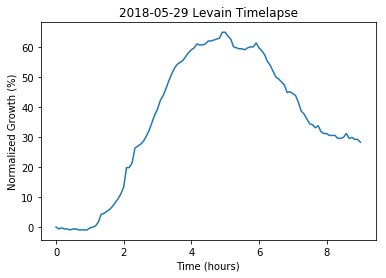

In [50]:
df_529right = ta.analyze_image('2018-05-29 Levain Timelapse, Right', crop_area=[100, 990, 950, 1050], min_area=20000)

In [58]:
ta.create_gif('2018-05-29 Levain Timelapse, Right', crop_area=[100, 990, 950, 1050], min_area=20000, df=df_529right)

# 2018-05-31 Levain Timelapse - First Feeding

In [62]:
@interact(index=widgets.IntSlider(min=0,max=95,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-05-31 Levain Timelapse/*.jpg')
    ta.test_image(fnames[index], crop_area=[0, 1100, 650, 900]);


interactive(children=(IntSlider(value=10, description='index', max=95), Output()), _dom_classes=('widget-interact',))

304 1080


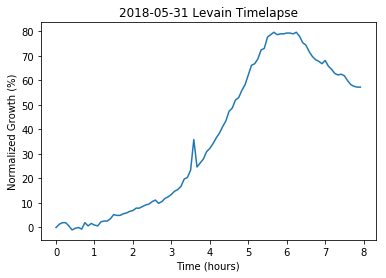

In [53]:
df_531 = ta.analyze_image('2018-05-31 Levain Timelapse', crop_area=[0, 1100, 650, 900])

In [55]:
ta.create_gif('2018-05-31 Levain Timelapse', crop_area=[0, 1100, 650, 900], min_area=30000, df=df_531)

# 2018-05-31 Levain Timelapse 2 - Second Feeding

In [53]:
@interact(index=widgets.IntSlider(min=0,max=85,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-05-31 Levain Timelapse 2/*.jpg')
    ta.test_image(fnames[index], crop_area=[100, 900, 440, 515], min_area=10000);


interactive(children=(IntSlider(value=10, description='index', max=85), Output()), _dom_classes=('widget-interact',))

213 800


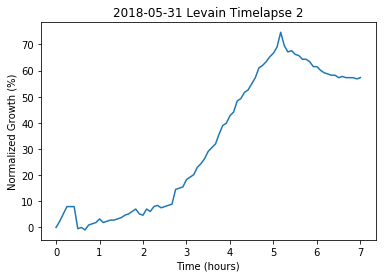

In [56]:
df_531_2 = ta.analyze_image('2018-05-31 Levain Timelapse 2', [100, 900, 440, 515], min_area=10000)

In [57]:
ta.create_gif('2018-05-31 Levain Timelapse 2', [100, 900, 440, 515], min_area=10000, df=df_531_2)

# 2018-06-10 Out of Fridge

In [67]:
@interact(index=widgets.IntSlider(min=0,max=115,step=1,value=10))
def view_frame(index):
    fnames = glob.glob('2018-06-10 Out of Fridge/*.jpg')
    ta.test_image(fnames[index], crop_area=[100, 900, 550, 750], min_area=50000);


interactive(children=(IntSlider(value=10, description='index', max=115), Output()), _dom_classes=('widget-interact',))

393 800


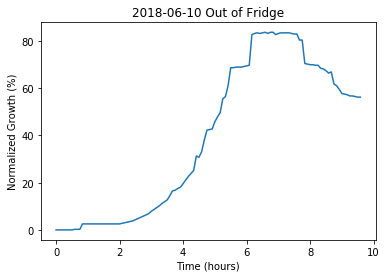

In [68]:
df_610 = ta.analyze_image('2018-06-10 Out of Fridge', crop_area=[100, 900, 550, 750], min_area=50000)

In [69]:
ta.create_gif('2018-06-10 Out of Fridge', crop_area=[100, 900, 550, 750], min_area=50000, df=df_610)

# Comparison
df_529left
df_529right
df_531
df_531_2

Text(0.5,1,'Levain Growth Over Time')

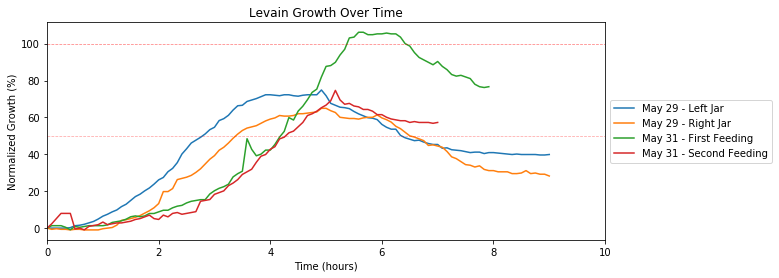

In [82]:
def plot_heights(ax, df, label):
    ax.plot(df['Time']/60, df['Height Normalized']*100, label=label)
    
fig, ax = plt.subplots(1, figsize=(10,4))

plot_heights(ax, df_529left, 'May 29 - Left Jar')
plot_heights(ax, df_529right, 'May 29 - Right Jar')
plot_heights(ax, df_531, 'May 31 - First Feeding')
plot_heights(ax, df_531_2, 'May 31 - Second Feeding')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Normalized Growth (%)')

ax.axhline(y=100, color='r', linestyle='--', alpha=0.5, linewidth=0.75)
ax.axhline(y=50, color='r', linestyle='--', alpha=0.35, linewidth=0.75)

ax.set_xlim([0, 10])
ax.set_title('Levain Growth Over Time')

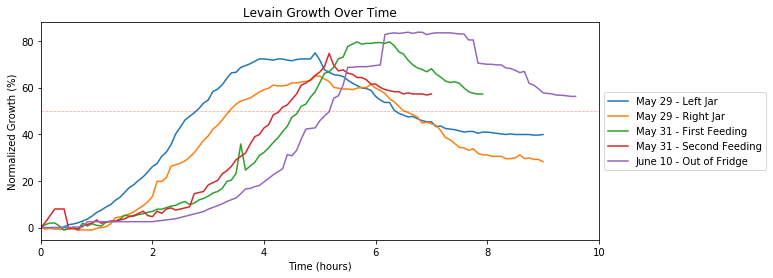

In [71]:
def plot_heights(ax, df, label):
    ax.plot(df['Time']/60, df['Height Normalized']*100, label=label)
    
fig, ax = plt.subplots(1, figsize=(10,4))

plot_heights(ax, df_529left, 'May 29 - Left Jar')
plot_heights(ax, df_529right, 'May 29 - Right Jar')
plot_heights(ax, df_531, 'May 31 - First Feeding')
plot_heights(ax, df_531_2, 'May 31 - Second Feeding')
plot_heights(ax, df_610, 'June 10 - Out of Fridge')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Normalized Growth (%)')

# ax.axhline(y=100, color='r', linestyle='--', alpha=0.5, linewidth=0.75)
ax.axhline(y=50, color='r', linestyle='--', alpha=0.35, linewidth=0.75)

ax.set_xlim([0, 10])
ax.set_title('Levain Growth Over Time')

plt.show()

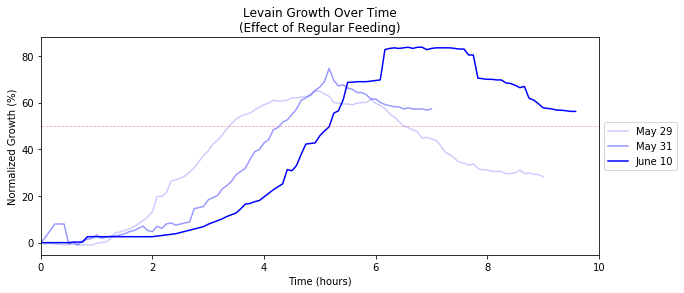

In [83]:
def plot_heights(ax, df, label, alpha=1):
    ax.plot(df['Time']/60, df['Height Normalized']*100, label=label, alpha=alpha, color='b')
    
fig, ax = plt.subplots(1, figsize=(10,4))

plot_heights(ax, df_529right, 'May 29', alpha=0.20)
plot_heights(ax, df_531_2, 'May 31', alpha=0.4)
plot_heights(ax, df_610, 'June 10', alpha=1)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Normalized Growth (%)')

# ax.axhline(y=100, color='r', linestyle='--', alpha=0.5, linewidth=0.75)
ax.axhline(y=50, color='r', linestyle='--', alpha=0.35, linewidth=0.75)

ax.set_xlim([0, 10])
ax.set_title('Levain Growth Over Time\n(Effect of Regular Feeding)')

plt.show()